In [2]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import winsound
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image
import os

In [4]:
waveFile = "./fma_small_wav/000/000010.wav"
rate, data = wav.read(waveFile)
data = data.T[0]

rc('animation', html='html5')
fig, ax = plt.subplots()
aSecond = int(len(data) / 30)
line1 = ax.plot([], [], lw=1)[0]
plt.close()

def compute(i):
    normalized = [ ele / (2**16) for ele in data[i * aSecond : i * aSecond + aSecond]]
    fftout = fft(normalized)
    limitx = int(len(fftout) / 2)
    return ( [ i / 30 for i in range(0, (limitx-1))], np.abs(fftout[:limitx-1]))

def init(): 
    line1.set_data([],[])
    ax.set_xlim((0, aSecond // 2 // 30))
    ax.set_ylim((0, 700))
    return [line1]

def animate(i):
    x, view = compute(i)
    line1.set_data(x, view)
    return [line1]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=(29), interval=1000, blit=True)

anim

In [5]:
winsound.PlaySound(waveFile, winsound.SND_FILENAME | winsound.SND_ASYNC)


In [7]:
freqnotes = []
for note in notes:
    avgFreq = 0;
    totalAmp = 0;
    for i in range(0, len(note[0])):
        frequency = note[0][i]
        amplitude = note[1][i]
        avgFreq = frequency * amplitude
        totalAmp = totalAmp + amplitude
#     avgFreq = avgFreq / totalAmp
    freqnotes.append(avgFreq)
freqnotes

[9.683129996673433,
 37.4387836223554,
 46.890731727175535,
 50.46696889322237,
 72.52689076152475,
 20.227115854162122,
 22.67725710731288,
 65.79970225963957,
 63.16380216231484,
 0.37922251937345675,
 22.830608101722788,
 31.52343338772898,
 10.187363030672032,
 41.19610753833438,
 8.647236396034652,
 26.997622219057178,
 63.3273220739968,
 65.27862832990138,
 2.4595899744803345,
 21.311880678491267,
 74.9485111890031,
 8.648686054736606,
 55.31690176484907,
 52.7507552083614,
 10.56929631023295,
 60.252407352236595,
 20.602888772377703,
 22.68613845192328,
 22.6963479362441]

In [171]:
notes[0][1]

array([1.39512634, 3.39214949, 2.46419907, ..., 0.01437214, 0.01392504,
       0.01318629])

In [176]:
max(freqnotes)

0.0004416188407161997

In [250]:
from math import sin
def fakeData():
    return [sin(2 * i) for i in range(0, len(data))]

In [261]:
data = fakeData()

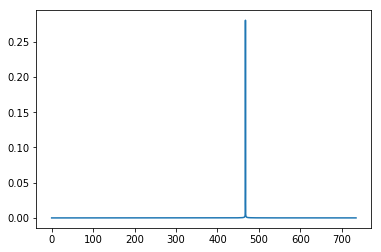

In [262]:
plt.plot(compute(0)[0],compute(0)[1])
plt.show()

In [268]:
max(compute(0)[1])

0.28069711730875885

In [24]:
x,y = 2000, 300
winsound.Beep(x, 500)
winsound.Beep(y, 500)
winsound.Beep((x + y)//2, 500)
winsound.Beep(int(2/((1/x) + (1/y))), 500)

In [44]:
def get_notes_from(id):
    path = os.path.abspath("./fma_small_wav/%03d/%06d.wav" % (id // 1000, id))
    rate, data = wav.read(path)
    data = data.T[0]
    notes = [compute(i) for i in range(0,30)]
    freqnotes = []
    for note in notes:
        avgFreq = 0;
        totalAmp = 0;
        for i in range(0, len(note[0])):
            frequency = note[0][i]
            amplitude = note[1][i]
            avgFreq = frequency * amplitude
            totalAmp = totalAmp + amplitude
        freqnotes.append(avgFreq)
    return freqnotes